In [14]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


#### In progress

In [72]:
#profits per item



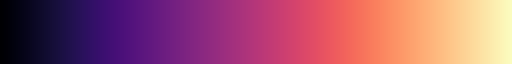

In [66]:
#sns.set_style("whitegrid")


### BI-VARIATE

In [2]:
df=pd.read_excel("Superstore_USA.xlsx")


In [3]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [16]:
df.Sales

0          5.90
1         13.01
2         49.92
3         41.64
4       1446.67
         ...   
9421     447.87
9422      13.23
9423    2215.93
9424     506.50
9425     172.48
Name: Sales, Length: 9426, dtype: float64

In [5]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

## Bi-Variat KDEs 

## Sales vs Profit`

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

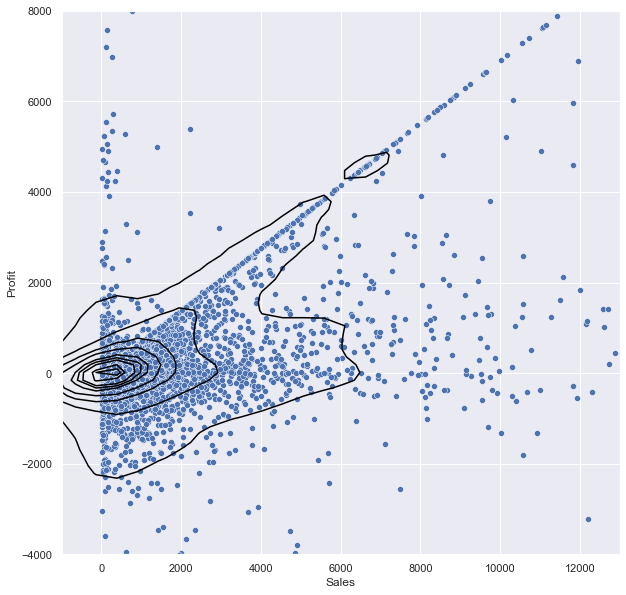

In [29]:
fig = plt.figure(figsize=(10,10))
plt.ylim(-4000,8000)
plt.xlim(-1000,13000)
sns.scatterplot(df.Sales,df.Profit)
sns.kdeplot(df.Sales,df.Profit,color="black")

In [31]:
df.Sales.unique(),df.Profit.unique()

(array([   5.9 ,   13.01,   49.92, ..., 2215.93,  506.5 ,  172.48]),
 array([    1.32      ,     4.56      ,   -47.64      , ...,
        -1225.02909672,   349.485     ,    78.0624    ]))

In [34]:
df[["Sales","Profit"]].head(10)

,Sales,Profit
0,5.90,1.3200
1,13.01,4.5600
2,49.92,-47.6400
3,41.64,-30.5100
4,1446.67,998.2023
5,2011.67,1388.0523
6,1451.37,1001.4453
7,6362.85,4390.3665
8,113.25,-141.2600
9,1515.17,1045.4673


##### this here shows clear linear line b/w these two values,as the values of sales increased the is decent rise in the profit too,even before the increasing values of sales there might be some item or reason that profits are hiked in start whhich we'll analyze later

### PROFIT ON  VARIOUS PRICES 


<AxesSubplot:xlabel='Unit Price', ylabel='Profit'>

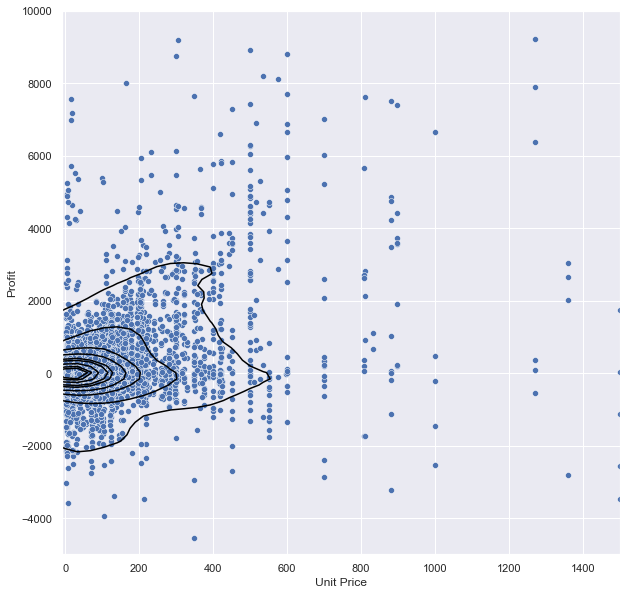

In [46]:
fig = plt.figure(figsize=(10,10))
plt.ylim(-5000,10000)
plt.xlim(-10,1500)
sns.scatterplot(df["Unit Price"],df.Profit)
sns.kdeplot(df["Unit Price"],df.Profit,color="black")


### SALES ON  VARIOUS PRICES 


<AxesSubplot:xlabel='Unit Price', ylabel='Sales'>

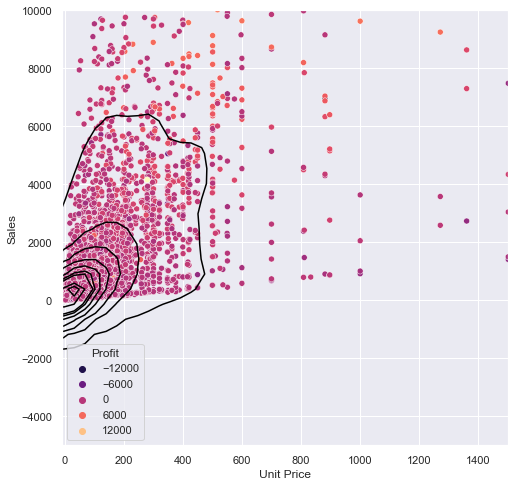

In [71]:
sns.color_palette("magma",as_cmap=True)
fig = plt.figure(figsize=(8,8))
plt.ylim(-5000,10000)
plt.xlim(-10,1500)
sns.scatterplot(df["Unit Price"],df.Sales,hue=df.Profit, palette=("magma"),cmap=True)
sns.kdeplot(df["Unit Price"],df.Sales,color="black")


##### The graph clearly shows the density of price towards the increasing of it ,there are more sales(existence of data)towards less prices of items ,which can later help us to identify the sales on different categories and prices